In [64]:
using LinearAlgebra
using Plots
include("polynodes.jl")
include("aux_hfd.jl")
include("hfdTypes.jl")
include("postprocess.jl")

Main.HfdPostProcess

In [66]:
occ = Dict(-1 => [2])
N= 33
cpars = hfd_funcs.CalcParams(2e0, N;  scale = 0.5)
grid2 = hfd_funcs.leg_rat_grid(N, 1e0)
occ_block, ztot = hfd_funcs.from_dict(occ, Float64, N)
hfd_funcs.hcore_calc!(cpars, grid2, occ_block)
hs = hfd_funcs.hfd_calc!(cpars, grid2, occ_block;tol=1e-9)


+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 2.0
!atomic scale: 0.5 a.e
|fine structure constant: 0.0072973525643
|number of nodes in radial grid: 33
|maximal iteration number: 3
|tolerance: 1.0e-6
|dumping: 0.5 
|aitken accelerated: false
|non-interacting electrons approximation


+=========================================================
iter no: 1
κ      |δpot|
-1  0.0
orbital energies:
[-2.000106514118435]
+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 2.0
!atomic scale: 0.5 a.e
|fine structure constant: 0.0072973525643
|number of nodes in radial grid: 33
|maximal iteration number: 50
|tolerance: 1.0e-9
|dumping: 0.5 
|aitken accelerated: false
|Dirac Hartree Fock


+=========================================================
iter no: 1
κ      |δpot|
-1  0.06323467011530359
orbital energies:
[-0.799550105098453

66×66×1 Array{Float64, 3}:
[:, :, 1] =
 -0.998912    -1.10849e-7  -3.15244e-7  …     0.00451542     -0.00128932
 -9.03007e-9  -0.994248    -2.07703e-6       -0.00681863      0.0019469
 -9.65328e-9  -4.66206e-7  -0.985775          0.00858496     -0.0024511
 -1.26639e-8  -3.94541e-7  -5.23646e-6       -0.0101153       0.00288779
 -1.5161e-8   -3.38174e-7  -5.33189e-6        0.0115269      -0.00329044
 -1.92672e-8  -2.4602e-7   -5.62099e-6  …    -0.0128836       0.00367719
 -2.31315e-8  -1.56792e-7  -5.84345e-6        0.0142272      -0.00405998
 -2.82781e-8  -4.00802e-8  -6.1747e-6        -0.0155898       0.00444793
 -3.31661e-8   7.43824e-8  -6.45635e-6        0.0169991      -0.00484881
 -3.90507e-8   2.10547e-7  -6.8129e-6        -0.018481        0.00526996
 -4.4485e-8    3.41097e-7  -7.10737e-6  …     0.020062       -0.00571882
 -5.0564e-8    4.86518e-7  -7.44372e-6       -0.0217707       0.00620339
 -5.58252e-8   6.19334e-7  -7.6882e-6         0.0236395      -0.00673266
  ⋮           

In [73]:
occ = Dict(-1 => [2 2],
           1=> [2], -2 => [4])
N= 33
cpars = hfd_funcs.CalcParams(1e1, N;  scale=1e0)
grid2 = hfd_funcs.leg_rat_grid(N, 1e0)
occ_block, ztot = hfd_funcs.from_dict(occ, Float64, N)
hfd_funcs.hcore_calc!(cpars, grid2, occ_block)
hfd_funcs.hfd_calc!(cpars, grid2, occ_block;tol=1e-7)

+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 10.0
!atomic scale: 1.0 a.e
|fine structure constant: 0.0072973525643
|number of nodes in radial grid: 33
|maximal iteration number: 3
|tolerance: 1.0e-6
|dumping: 0.5 
|aitken accelerated: false
|non-interacting electrons approximation


+=========================================================
iter no: 1
κ      |δpot|
-2  0.0
-1  0.0
1  0.0
orbital energies:
[-50.06674201680129, -12.520859662918333, -12.520859662928885, -12.5041630336174]
+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 10.0
!atomic scale: 1.0 a.e
|fine structure constant: 0.0072973525643
|number of nodes in radial grid: 33
|maximal iteration number: 50
|tolerance: 1.0e-7
|dumping: 0.5 
|aitken accelerated: false
|Dirac Hartree Fock


+=========================================================
iter no:

66×66×3 Array{Float64, 3}:
[:, :, 1] =
 -9.96019      -3.70074e-5   -6.31307e-5   …       0.0451542    -0.0128932
 -1.07172e-7   -9.78996      -0.000544938         -0.0681863     0.019469
 -7.59016e-9   -2.2661e-5    -9.4854               0.0858496    -0.024511
 -4.04895e-9   -4.59779e-6   -0.00028477          -0.101153      0.0288779
 -4.8776e-10   -1.71068e-6   -8.16241e-5           0.115269     -0.0329044
 -4.35018e-10  -5.20467e-7   -3.08888e-5   …      -0.128836      0.0367719
 -2.91837e-11  -2.37014e-7   -1.11423e-5           0.142272     -0.0405998
 -3.94307e-11  -8.31049e-8   -4.65995e-6          -0.155898      0.0444793
  1.244e-11    -3.99397e-8   -1.86699e-6           0.169991     -0.0484881
  3.22191e-12  -1.43717e-8   -8.88888e-7          -0.18481       0.0526996
  2.16831e-12  -5.1785e-9    -4.73586e-7   …       0.20062      -0.0571882
 -4.65171e-12   1.91208e-10  -3.21488e-7          -0.217707      0.0620339
 -8.81932e-12   2.60396e-9   -2.47284e-7           0.236395    

In [74]:
HfdPostProcess.moments(cpars, grid2, occ_block) 

4×3 Matrix{Float64}:
 1.0  0.156769  0.0330524
 1.0  0.897758  0.983102
 1.0  1.01907   1.39871
 1.0  1.02308   1.41011

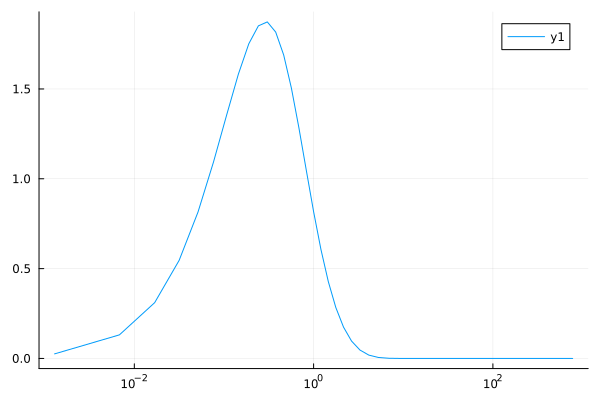

In [87]:
plot(grid2.xs, occ_block.vecs[1:cpars.N, 3]; xaxis=:log10)

In [1]:
div(5, 2)

2

In [35]:
hfd_funcs.symb3j0.gam2s(3, 3, 6)

0.06428571428571428